Task 1 (10 points): Describe a machine learning problem that you would like to solve using
Logistic Regression. Clearly state why Logistic regression is the best choice for solving this
problem.


I would like to work on this problem: Diagnostic Wisconsin Breast Cancer Database. This problem is solvable by logistic regression.
First, this problem is a binary classification problem: whether there is a cancer. Such task aligns with the output of logistic regression. The output of logistic regression is essentially the probably. We can classify the output as whether the probability is greater or equals to 0.5 as having cancer.
Second, except ID, all attributes are continuous, which means we don't need to convert categorical attributes into numerical attributes using one-hot encoding. After getting the data, just normalize the data and directly perform logistic regression.
Third, there is no missing data and there are 569 instances, which means the dataset is clean to perform logistic regression, and there are enough instances to make the classification.

Task 2 (20 points): Pick a publicly available dataset (except The Titanic Dataset) that you will
use to solve this problem. You must provide a link to the dataset and perform the necessary
Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a
justification of why these were required. For example, if the dataset has lot of missing values,
then why did you use a specific technique when handling missing data. This task may include
data visualization (Check this link : https://www.geeksforgeeks.org/top-8-python-libraries-for-
data-visualization/ ).

In [20]:
!pip3 install -U ucimlrepo
!pip3 install numpy pandas scikit-learn seaborn matplotlib

In [2]:
# Directly from https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [10]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [14]:
X.head() # data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y.head() # target

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: None
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [18]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


The graph is made to show the distribution of the dataset. It seems the dataset is distributed somehow evenly and well constructured, not skewed to one specific feature.

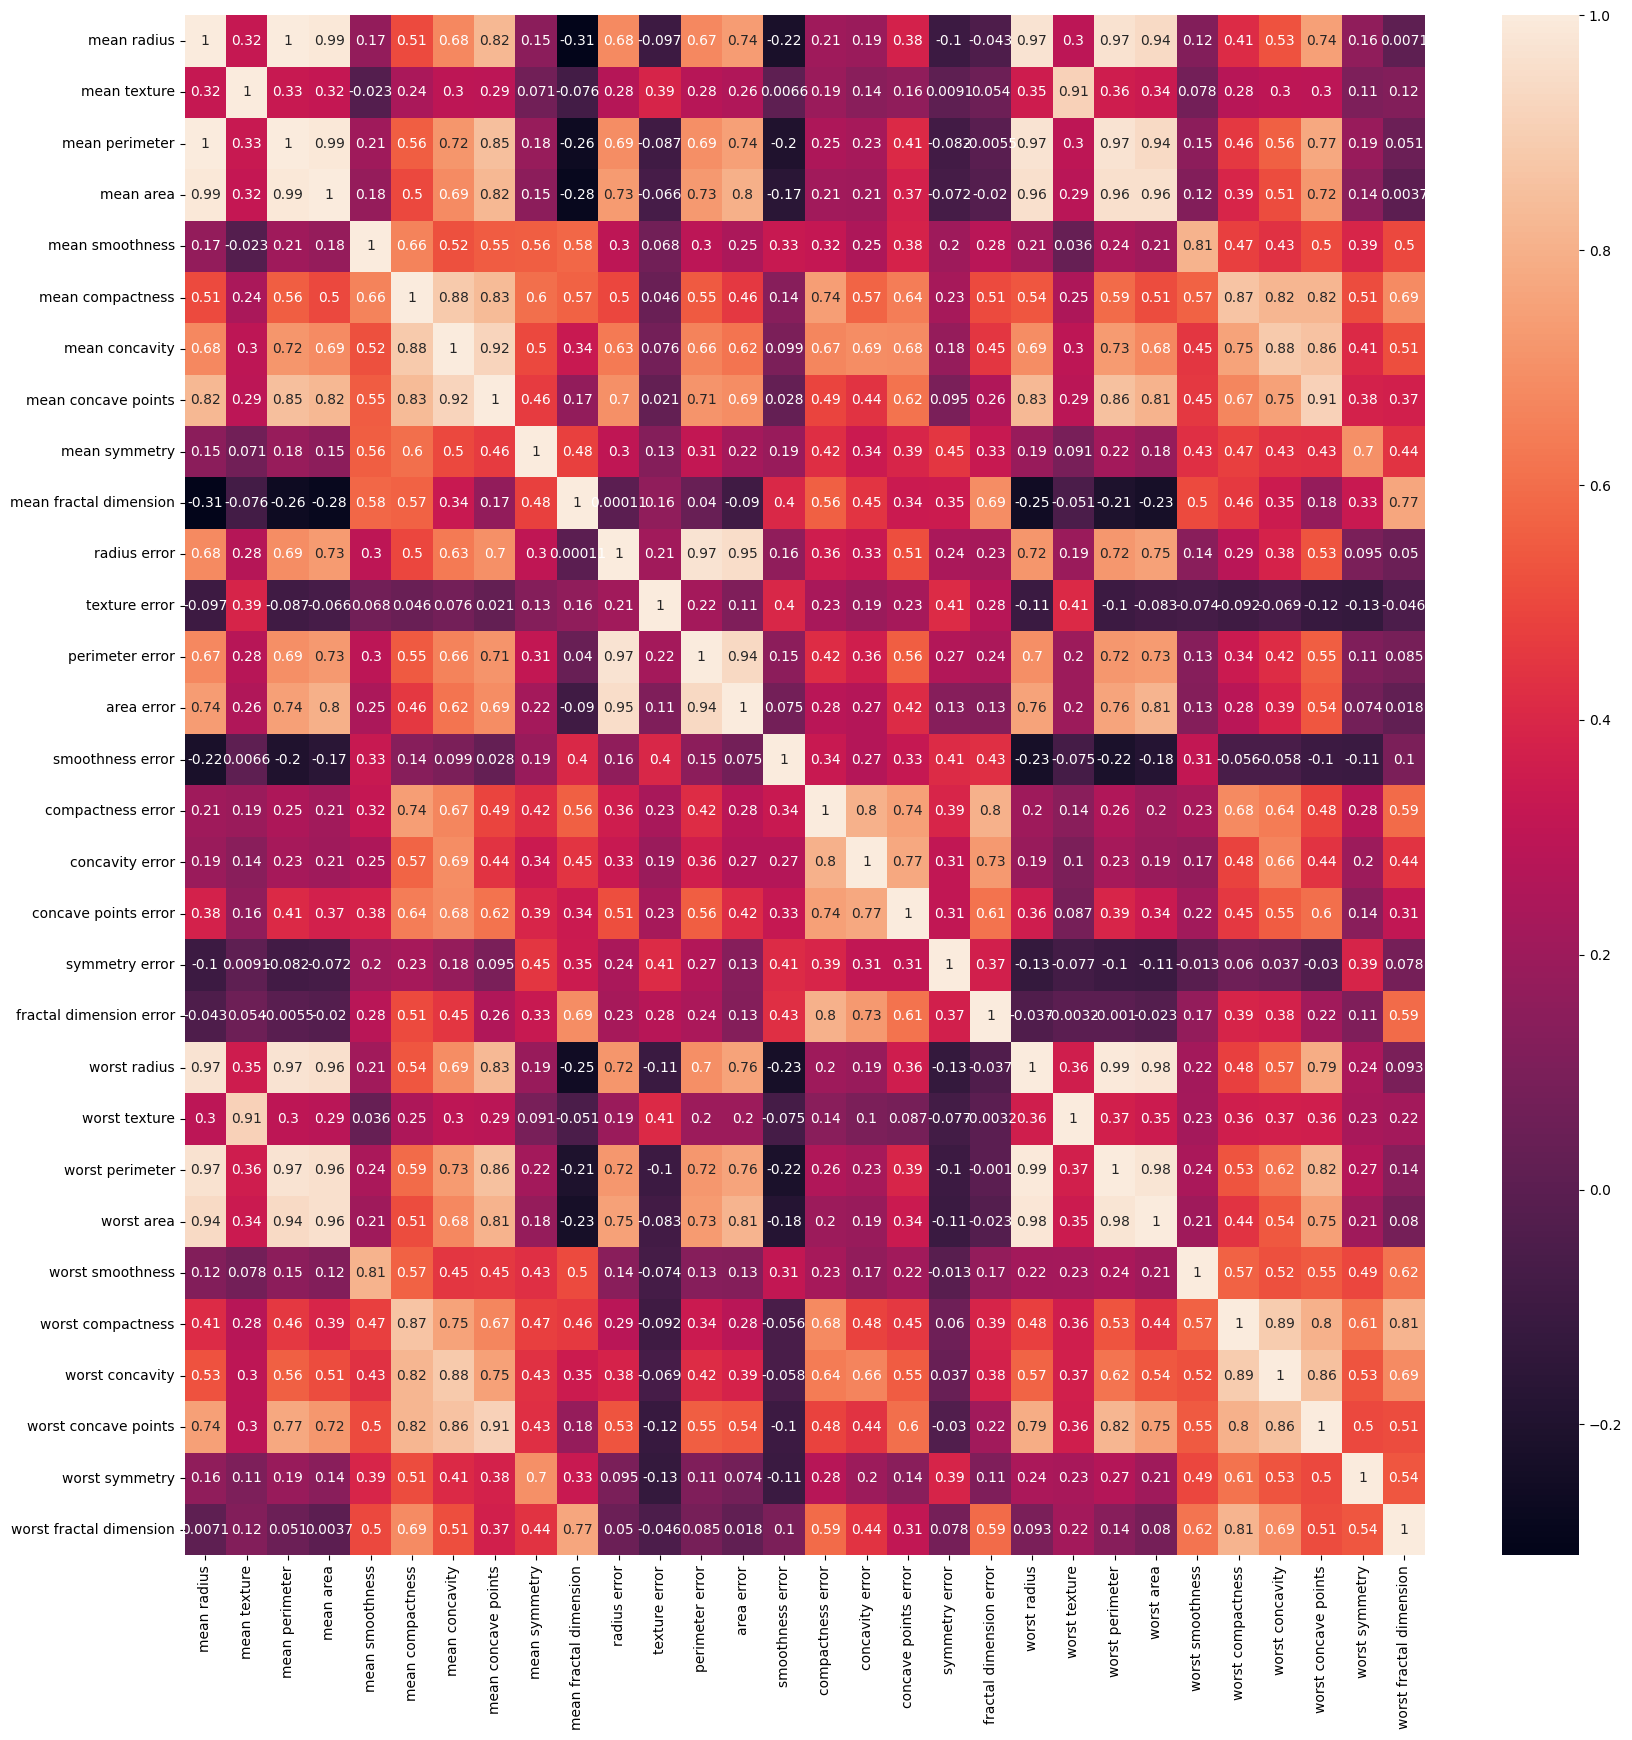

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = X.corr()
sns.heatmap(corr, annot=True, ax=plt.subplots(figsize=(20,20))[1])
plt.show()

Comments: there are some attributes that actually stands out based on the heatmap above. Some of them are obvious according to the common knowledge instead of the dataset itself, like mean area and mean radius. It seems like all the correlation above 0.75 align with the common knowledge instead of special construction of the dataset, which means this dataset is good to perform logistic, and we can assume that this dataset is not affected by different attributes (radius, texture, perimeter, etc, not the mean, error, worst).

## Analysis:
This dataset seems to be collected in a good manner, and the dataset is well constructed. Different types of attributes are having low correlation between each other (not the different aspect of the same attribute). Such constructure avoids the dependence between different types of attributes. With 30 features, each instance has enough attributes to be classified as well. With detailed information and real world diagnostic, such dataset is a good source of studying breast cancer using machine learning algorithm like logistic regression.

Task 3 (25 points): Implement, Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form. (Refer to the research paper discussed in class).

Stochastic Gradient Descent Accuracy: 0.956140350877193
Loss: 0.03608383526900248


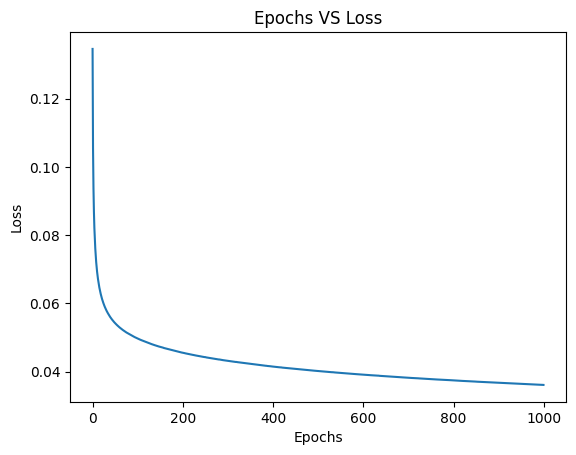

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize the features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Add intercept term
X_train['intercept'] = 1
X_test['intercept'] = 1

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Sigmoid Function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Cost Function
def cost_func(X, y, w):
  n = len(X)
  p = sigmoid(X.dot(w))
  #print(np.log(p))
  #cost = y.T.dot(p)
  p = np.clip(p, 1e-5, 1 - 1e-5) # Clip the probability to avoid really small number that does not work in cost_func
  cost = (-1 / n) * (y.T.dot(np.log(p)) + (1 - y).T.dot(np.log(1 - p)))
  return cost


# Batch Gradient Descent
def batch_gradient_descent(X, y, w, lr, iter):
    m = len(y)
    loss = []
    for i in range(iter):
        w = w - (lr/m) * X.T.dot(sigmoid(X.dot(w)) - y)
        loss.append(cost_func(X, y, w))
    return w, loss

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, w, lr, iter):
    m = len(y)
    loss = []
    for _ in range(iter):
      combined = np.column_stack((X, y))
      np.random.shuffle(combined)
      X_s = combined[:, :-1]
      y_s = combined[:, -1]

      for i in range(m):
        xi = X_s[i]
        yi = y_s[i]
        w = w - lr * xi.T.dot(sigmoid(xi.dot(w)) - yi)
      loss.append(cost_func(X, y, w))
    return w, loss

# Model training Stochastic Gradient Descent
iterations = 1000
learning_rate = 0.01
w = np.zeros(X_train.shape[1])
w, loss = stochastic_gradient_descent(X_train, y_train, w, learning_rate, iterations)

# Prediction
def predict(X, weights):
    return [1 if x >= 0.5 else 0 for x in sigmoid(X.dot(w))]

# Predict on test set
y_pred = predict(X_test, w)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f'Stochastic Gradient Descent Accuracy: {accuracy}')
print(f'Loss: {loss[-1]}')

plt.figure()
plt.plot(np.arange(1000), loss, label='Loss')
plt.title("Epochs VS Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()





In [40]:
print(len(loss))
print(len(np.arange(1000)))

1000
1000


Batch Gradient Descent Accuracy: 0.9824561403508771
Loss: 0.1071439247363765


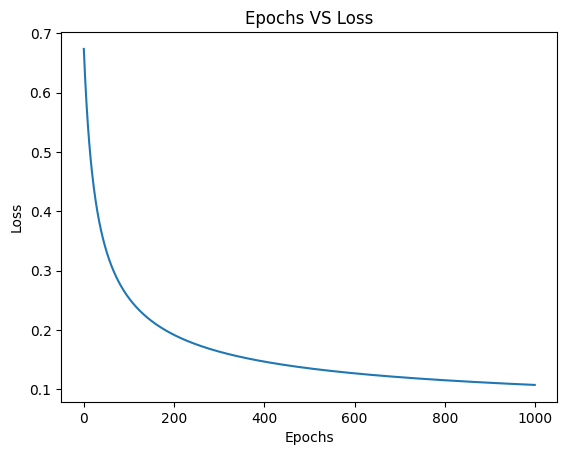

In [42]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Add intercept term
X_train['intercept'] = 1
X_test['intercept'] = 1

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Model training
iterations = 1000
learning_rate = 0.01
w = np.zeros(X_train.shape[1])
w, loss = batch_gradient_descent(X_train, y_train, w, learning_rate, iterations)

# Prediction
def predict(X, weights):
    return [1 if x >= 0.5 else 0 for x in sigmoid(X.dot(w))]

# Predict on test set
y_pred = predict(X_test, w)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print(f'Batch Gradient Descent Accuracy: {accuracy}')
print(f'Loss: {loss[-1]}')

plt.figure()
plt.plot(np.arange(1000), loss, label='Loss')
plt.title("Epochs VS Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


The above block implemented stochastic gradient descent and batch gradient descent. As the result and the graph shows, both gradient descent performs well.

Task 4 (45 points): Pick any 2 optimization algorithms that are used to optimize the ‘vanilla’
gradient descent. Implement both. You may implement these algorithms yourself OR use a
package. In your conclusion, compare both optimization techniques/algorithms with respect to
the results you achieve. Also compare these results with the original implementation of
gradient descent (Task 3 above). Describe why we should or why we should not use
optimization algorithms for the task at hand. For comparison of these algorithms define an
evaluation metric appropriate for your problem. (For more on evaluation metrics check this
link: https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html )

Below, I tried two different stochastic gradient descent: momentum and nestrov momentum. The momentum are set to 0.9 in both case. I am using sklearn package to implement both gradient descent algorithm.

In [44]:
# Prediction
def predict_y(y):
    return [1 if x >= 0.5 else 0 for x in y]

from sklearn.neural_network import MLPRegressor

# ================================================================= Momentum ===========================================================

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30) # different random state

# Normalize the features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Add intercept term
X_train['intercept'] = 1
X_test['intercept'] = 1

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
clf_momentum = MLPRegressor(solver='sgd',
                   activation='logistic',
                    max_iter=1000,
                    #hidden_layer_sizes=(),
                   learning_rate_init=0.01,
                   nesterovs_momentum=False,
                   ) # SGD with Momentum


clf_momentum.fit(X_train, y_train)
y_pred = clf_momentum.predict(X_test)
print("momentum accuracy: ", np.mean(predict_y(y_pred) == y_test))

# ======================================================= Nestrov Momentum =========================================================

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # different random state

# Normalize the features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Add intercept term
X_train['intercept'] = 1
X_test['intercept'] = 1

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

clf_nestrov = MLPRegressor(solver='sgd',
                   activation='logistic',
                    max_iter=1000,
                    #hidden_layer_sizes=(),
                   learning_rate_init=0.01,
                   nesterovs_momentum=True,
                   )
#print('Score:',clf.score(X_test,y_test))

clf_nestrov.fit(X_train, y_train)
y_pred = clf_nestrov.predict(X_test)
print("nestrov momentum accuracy: ", np.mean(predict_y(y_pred) == y_test))

momentum accuracy:  0.9473684210526315
nestrov momentum accuracy:  0.9736842105263158


Both SGD variant (momentum and nestrov accelerated momentum) performed pretty well in this dataset. I think these two algorithms are safe to use to perform classification. However, nestrov momentum seems to perform slightly better than momentum, and nestrov momentum actually surpasses stochastic gradient descent (0.95). In this case, I would suggest using nestrov accelerated momentum instead of vanilla momentum. However, batch gradient descent performs the best (0.98), which make sense because batch gradient descent actually uses the whole dataset to find the optimal direction.

In brief, SGD with nestrov momentum would be a good idea if the memory is limited, otherwise batch gradient descent would be a better option.